# Epidemiological Model Assignment - Parameter exploration

In [105]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import odeint
import seaborn as sns

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

In [106]:
# SIRD model implementation (reused from computer practical 2)
def sird_model(y, t, beta, gamma, mu):
    """SIRD model with death compartment.

    Args:
        y (list or array): Initial conditions for the compartments [S, I, R, D].
        t (float): Time point (in days).
        beta (float): Transmission rate (probability of disease spread per contact).
        gamma (float): Recovery rate (rate at which infectious individuals recover).
        mu (float): Mortality rate (rate at which infectious individuals die).

    Returns:
        tuple (dSdt, dIdt, dRdt, dDdt): Rates of change for each compartment .
    """
    S, I, R, D = y 
    N = S + I + R + D

    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I - mu * I
    dRdt = gamma * I
    dDdt = mu * I

    return dSdt, dIdt, dRdt, dDdt

In [107]:
def run_sird_simulation(beta, gamma, mu, N=1000, I0=10, days=150):
    """Runs the SIRD model simulation.

    Args:
        beta (float): Transmission rate.
        gamma (float): Recovery rate.
        mu (float): Mortality rate.
        N (int, optional): Total population size. Defaults to 1000.
        I0 (int, optional): Initial number of infectious individuals. Defaults to 10.
        days (int, optional): Number of days to simulate. Defaults to 150.

    Returns:
        tuple: (t, S, I, R, D) where:
            t (numpy.ndarray): Array of time points (in days).
            S (numpy.ndarray): Array of susceptible population over time.
            I (numpy.ndarray): Array of infectious population over time.
            R (numpy.ndarray): Array of recovered population over time.
            D (numpy.ndarray): Array of deaths over time.
    """

    S0 = N - I0
    R0 = 0
    D0 = 0
    y0 = [S0, I0, R0, D0]

    t = np.linspace(0, days, days)
    sol = odeint(sird_model, y0, t, args=(beta, gamma, mu))
    S, I, R, D = sol.T

    return t, S, I, R, D

## Part 1: Parameter analysis function (50 points)

### 1.1 Function implementation

see below

### 1.2 Requirements

- Test recovery rates: gamma_values = [0.05, 0.1, 0.15, 0.2, 0.25]
- For each γ value, calculate:

    - Peak number of infectious individuals
    - Day when peak occurs
    - Total deaths at end of simulation
    - Basic reproduction number (R₀ = β/γ)

- Return results as a formatted pandas DataFrame
- Generate a publication-quality plot showing all epidemic curves

### 1.3 Expected output format

Your function should produce:

- A DataFrame with columns: ['gamma', 'R0', 'peak_infected', 'peak_day', 'total_deaths']
- A matplotlib figure with properly labeled axes, legend, and title


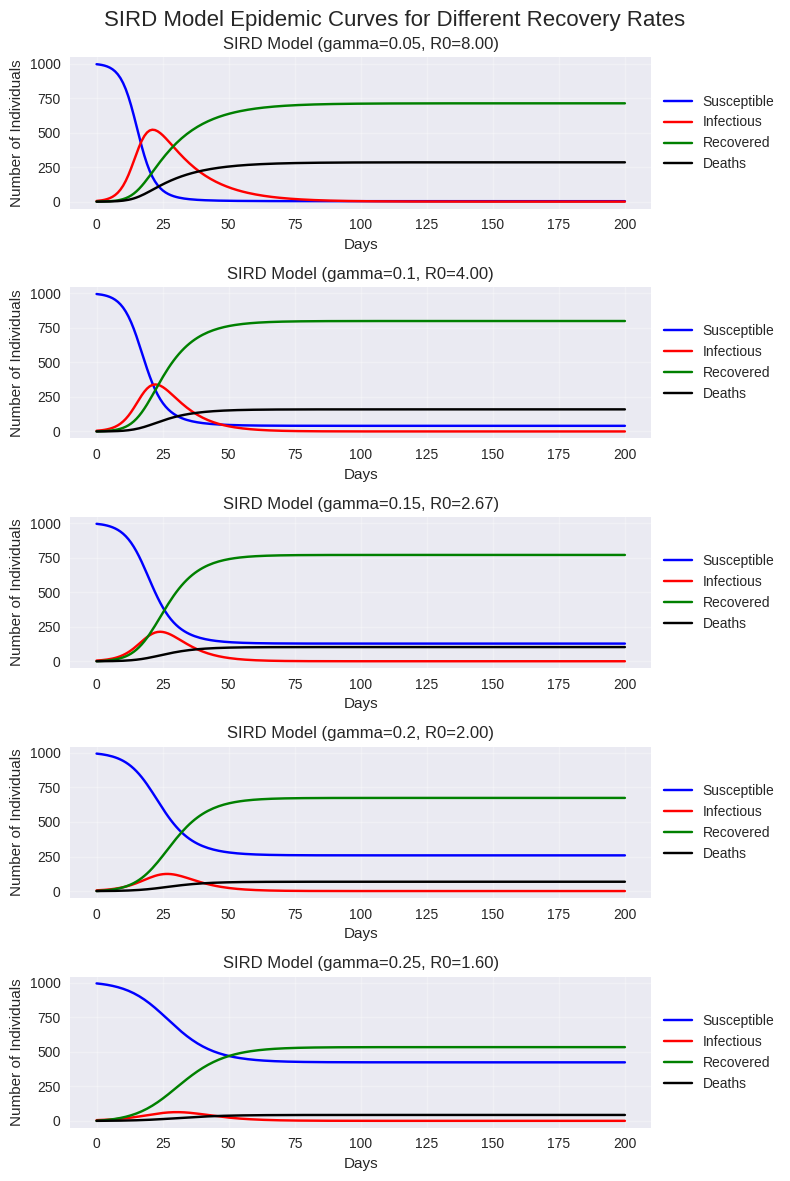

Parameter Analysis Results:
   gamma   R0  peak_infected  peak_day  total_deaths
0    0.0  8.0          520.8        21         284.8
1    0.1  4.0          340.3        22         159.9
2    0.2  2.7          213.5        24         102.6
3    0.2  2.0          123.8        27          67.4
4    0.2  1.6           63.1        30          42.7


In [108]:
def analyze_recovery_rates(beta, mu, N, I0, simulation_days):
    """Analyze epidemic outcomes for different recovery rates. With gamma values: [0.05, 0.1, 0.15, 0.2, 0.25]
    
    Args:
        beta (float): Transmission rate.
        mu (float): Mortality rate.
        N (int): Total population.
        I0 (int): Initial infected individuals.
        simulation_days (int): Simulation duration in days.

    Returns:
        pandas.DataFrame: Results summary for each recovery rate.
    """
    # Define recovery rates to analyze
    gamma_values = [0.05, 0.1, 0.15, 0.2, 0.25]

    # Prepare to store results and plots
    results = []
    fig, axes = plt.subplots(5, 1, figsize=(8, 12))
    fig.suptitle('SIRD Model Epidemic Curves for Different Recovery Rates', fontsize=16)

    for i, gamma in enumerate(gamma_values):
        #  Run simulation to get data
        t, S, I, R, D = run_sird_simulation(beta, gamma, mu, N=N, I0=I0, days=simulation_days)

        # Calculate metrics
        peak_infected = max(I)
        peak_day = np.argmax(I)
        total_deaths = D[-1]
        R0 = beta / gamma

        # Store results
        results.append({
            "gamma": gamma,
            "R0": R0,
            "peak_infected": peak_infected,
            "peak_day": peak_day,
            "total_deaths": total_deaths
        })

        # SIRD curves
        axes[i].plot(t, S, label='Susceptible', color='blue')
        axes[i].plot(t, I, label='Infectious', color='red')
        axes[i].plot(t, R, label='Recovered', color='green')
        axes[i].plot(t, D, label='Deaths', color='black')
        axes[i].set_title(f'SIRD Model (gamma={gamma}, R0={R0:.2f})')
        axes[i].set_xlabel('Days')
        axes[i].set_ylabel('Number of Individuals')
        axes[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
        axes[i].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    results_df = pd.DataFrame(results)
    print("Parameter Analysis Results:")
    print(results_df.round(1))

    return results_df

# Example usage
results_df: pd.DataFrame = analyze_recovery_rates(beta=0.4, mu=0.02, N=1000, I0=5, simulation_days=200)

TODO: 
- Double-check requirements for part 1
- Format and style plots